# T8 Dimensionality reduction

## Principal component analysis

We generate an artifical dataset consisting of three variables. The three variables show some dynamics as function of time which varies from [0,10] s. 

We will perform a Principal Component Analysis on this dataset. The aim is to find two latent varaibles which could account for the dynamics of the original three variables. 


Let's start by importing the necessary libraries and creating the variables. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib notebook

# generating three time-dependent variables 
t = np.arange(1000)/100. # time array 
x1 = np.sin(t) + t/1. + np.random.rand(len(t))/2.
x2 = np.sin(t) - t/1. + np.random.rand(len(t))/2.
x3 = t/1. + np.random.rand(len(t))/2.


#### Visualize the raw data

As usual let's start by plotting the data first. Simply display the three variables as function of time. 

In [6]:
# your code goes here

#### Visualize the raw data in 3D

Let's also look at the three variables in the 3-dimensional space, where x1, x2 and x3 are used as x, y and z. Note that time is not explictely plotted in this depiction. It is implicit in the trajectory of the data. 

What do you observe when rotating the axes (use the interactive modus through `%matplotlib notebook`)? 

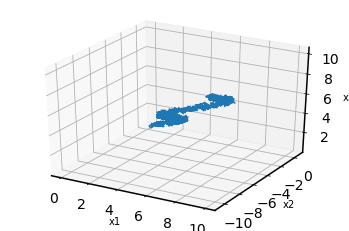

In [7]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot3D(x1, x2, x3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()

#### Check the correlation structure between variables

PCA removes correlations between variables. Let's see whether correlations between the three variables exist. In other words, let's calculate the covariance matrix. Use the matplotlib `np.cov()` function with the three variables as input argument. 

In [8]:
# your code goes here

#### Calculate the PCA 

Let's now move on to perform the PCA analysis. We will use the scikit learn module, specifically the `PCA` function in `sklearn.decomposition`. We will look at the PCA components (via `pca.components_`, the explained variance (via `pca.explained_variance_`) and the covariance matrix from the PCA (via `pca.get_covariance()`).  

In [9]:
# perform PCA analysis 
X = np.column_stack((x1,x2,x3)) # first we have to concatenate the three variables 
pca = PCA(n_components=3)
pca.fit(X)

print('PCA components :',pca.components_)
print('PCA explained variance :',pca.explained_variance_)
print('Covariance matrix :',pca.get_covariance())

PCA components : [[ 0.5682089  -0.58653987  0.5771565 ]
 [-0.71213505 -0.70193557 -0.01225271]
 [-0.41231338  0.40405127  0.81654164]]
PCA explained variance : [2.50783801e+01 9.10531825e-01 2.18870605e-02]
Covariance matrix : [[ 8.56232435 -7.9065478   8.22491705]
 [-7.9065478   9.07989523 -8.47461394]
 [ 8.22491705 -8.47461394  8.36857944]]


#### Visualize principal compnents in 3D

Let's plot the new basis vectors in the 3-dimensional space. What is the spatial relation between the three variables and the Eigenvectors? 

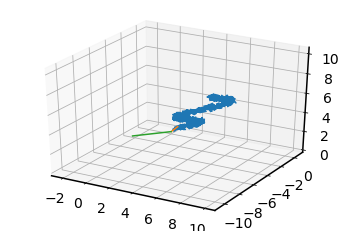

In [10]:
comp = pca.components_

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot3D(x1, x2, x3)
ax.plot([0,3*comp[0,0]],[0,3*comp[0,1]],[0,3*comp[0,2]])
ax.plot([0,3*comp[1,0]],[0,3*comp[1,1]],[0,3*comp[1,2]])
#### Visualize the raw data
plt.show()

#### Transform the original data in the PCA space

Next, let's now convert the data to the new space spanned by the principal components by using `pca.transform([original data])`. Plot the two first latent variables. 

In [11]:
X_pca = pca.transform(X)

print("original shape :   ", X.shape)
print("transformed shape :", X_pca.shape)

# plot new variables in the PCA space 

original shape :    (1000, 3)
transformed shape : (1000, 3)


#### Perform inverse tranformation

Finally, let's look at the inverse tranformation, i.e., the transformation from the PCA space back to the original coordinate system. Perform the inverse transformation for the three variables. 

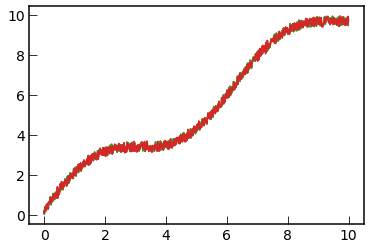

In [12]:
meanX = np.mean(X,axis=0)

Xhat = pca.inverse_transform(X_pca)
Xhat2 = np.dot(X_pca,comp) + meanX

fig = plt.figure()
ax0 = fig.add_subplot(1,1,1)
ax0.plot(t,x1)
ax0.plot(t,Xhat[:,0])
ax0.plot(t,Xhat2[:,0])
ax0.plot(t,X_pca[:,0]*comp[0,0]+X_pca[:,1]*comp[1,0]+meanX[0])
#ax0.plot(t,X_pca[:,1]*comp[1,0]+meanX[0],ls='--')

Try the inverse tranformation without taking into accout the first principal component. What does this mean? 

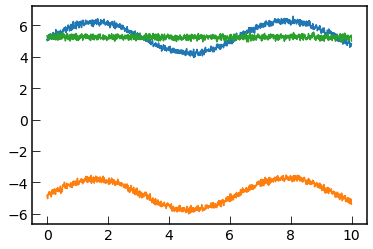

In [13]:
# reconstract original data without 1st principal component
Xhat = np.dot(X_pca[:,1:], pca.components_[1:,:])
Xhat += meanX

fig = plt.figure()
ax2 = fig.add_subplot(1,1,1)

ax2.plot(t,Xhat[:,0])
ax2.plot(t,Xhat[:,1])
ax2.plot(t,Xhat[:,2])

## The end